# DATA 221 Assignment 3
### Author: Saif Farag

## Question 1:

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("crime1.csv")

# Focus on the column ViolentCrimesPerPop
col = df["ViolentCrimesPerPop"]

# Compute statistics
mean_val = col.mean()
median_val = col.median()
std_val = col.std()
min_val = col.min()
max_val = col.max()

# Print results
print("Mean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)
print("Minimum:", min_val)
print("Maximum:", max_val)

# Compare the mean and median:
# The mean (0.441) is larger than the median (0.39), which suggests the
# distribution is slightly right-skewed. This means there are some higher
# values pulling the average upward.

# Extreme values:
# The mean is more affected by extreme values than the median because it
# uses every data point in its calculation. Very large or very small values
# can shift the mean significantly, while the median only depends on the
# middle position of the sorted data and is more robust to outliers.

Mean: 0.44119122257053295
Median: 0.39
Standard Deviation: 0.27635058478113994
Minimum: 0.02
Maximum: 1.0


## Question 2:

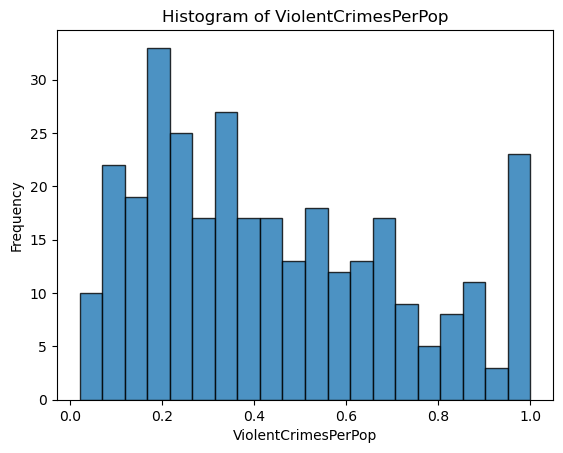

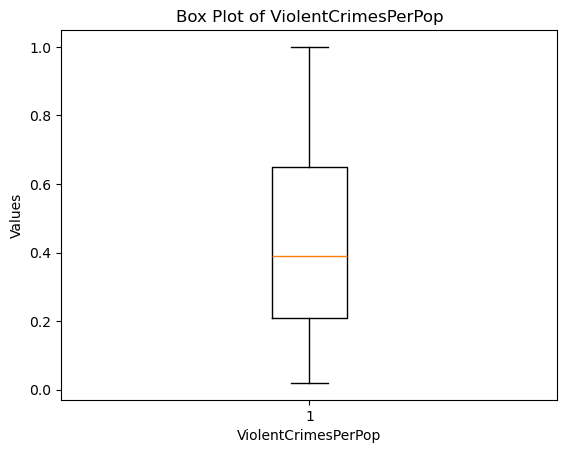

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("crime1.csv")
col = df["ViolentCrimesPerPop"]

# Histogram
plt.figure()
plt.hist(col, bins=20, edgecolor="black", linewidth=1, alpha=0.8)
plt.title("Histogram of ViolentCrimesPerPop")
plt.xlabel("ViolentCrimesPerPop")
plt.ylabel("Frequency")
plt.show()

# Box Plot
plt.figure()
plt.boxplot(col)
plt.title("Box Plot of ViolentCrimesPerPop")
plt.xlabel("ViolentCrimesPerPop")
plt.ylabel("Values")
plt.show()

# The histogram shows that most values are concentrated toward the lower range,
# with fewer higher values, suggesting a slight right skew in the data.
# The spread of the bars indicates variability in violent crime rates across observations.
# The box plot shows the median around 0.39, which divides the data into two halves.
# The median appears slightly closer to the lower quartile, supporting the idea of right skew.
# The whiskers extend toward both low and high values, but no individual points appear
# outside the whiskers, so the plot does not clearly indicate outliers.


## Question 3: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset and treat empty strings as missing
df = pd.read_csv("kidney_disease.csv")
df = df.replace("", np.nan)

# Create feature matrix X of all columns except classification
X = df.drop(columns=["classification"])

# Create label vector y using classification column
y = df["classification"].astype(str).str.strip()

# Convert categorical columns to numeric (one-hot)
X = pd.get_dummies(X, drop_first=True)

# Ensure numeric types
X = X.apply(pd.to_numeric, errors="coerce")

# Fill missing values
X = X.fillna(X.median(numeric_only=True))

# Split the dataset as 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Why we should not train and test a model on the same data?
# We should not train and test a model on the same data because the model
# could simply memorize the training examples instead of learning general
# patterns, which leads it to overfit to the data. This would lead to 
# perfect accuracy on your training data but very poor results on new, unseen data.

# What the purpose of the testing set is?
# The purpose of the testing set is to evaluate how well the trained model
# generalizes to data it has never seen before. It provides an unbiased
# estimate of model performance and helps detect over and underfitting.


## Question 4:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train K-Nearest Neighbors model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train using training data
knn.fit(X_train, y_train)

# Predict labels for test data
y_pred = knn.predict(X_test)


# Evaluation metrics
labels = ['ckd', 'notckd']
confusionMatrix = confusion_matrix(y_test, y_pred, labels = labels)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="ckd")
recall = recall_score(y_test, y_pred, pos_label="ckd")
f1 = f1_score(y_test, y_pred, pos_label="ckd")

print("Confusion Matrix:\n", confusionMatrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# True Positive (TP) means the model correctly predicts a patient has kidney disease.
# True Negative (TN) means the model correctly predicts a patient does not have kidney disease.
# False Positive (FP) means the model predicts kidney disease when the patient is actually healthy.
# False Negative (FN) means the model fails to detect kidney disease when it is present.
# Accuracy alone may not be enough because the dataset could be imbalanced, and a model could
# appear accurate while still missing many real disease cases.
# If missing a kidney disease case is very serious, recall is the most important metric because
# it measures how many actual positive cases are correctly identified.


Confusion Matrix:
 [[74  2]
 [ 0 44]]
Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9736842105263158
F1-score: 0.9866666666666667


## Question 5:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

k_values = [1, 3, 5, 7, 9]

results = []

# Train multiple KNN models
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append([k, accuracy])

# Create small table
results_df = pd.DataFrame(results, columns=["k", "Test Accuracy"])

print(results_df)

# Identify best k
best_k = results_df.loc[results_df["Test Accuracy"].idxmax(), "k"]
print("Best k:", best_k)

# Changing k affects how smooth or flexible the model is. Small values of k
# make the model rely heavily on nearby points, which makes it sensitive to noise.
# Very small k values may cause overfitting because the model follows individual
# data points too closely. Larger k values make predictions more stable by averaging
# more neighbors, but very large k may cause underfitting by oversmoothing patterns.


   k  Test Accuracy
0  1       0.983333
1  3       0.983333
2  5       0.983333
3  7       0.975000
4  9       0.966667
Best k: 1
